# 模型评估与改进

In [1]:
# 导包

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import mglearn
import numpy as np
import pandas as pd

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
line = LogisticRegression().fit(X_train, y_train)
print("The score of LogisticRegression: {:.2f}".format(line.score(X_test, y_test)))

The score of LogisticRegression: 0.88


## 交叉验证（cross-validation）
* 把数据集等分之后按照顺序，进行测试集与训练集的采样，然后精度计算

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

score = cross_val_score(logreg, iris.data, iris.target, cv=5)
# 划分五个区间，按照顺序选择一个区间作为测试集，其余为训练集
print(score)


[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [3]:
print("The average of cross-validation score: {}".format(score.mean()))

The average of cross-validation score: 0.9733333333333334


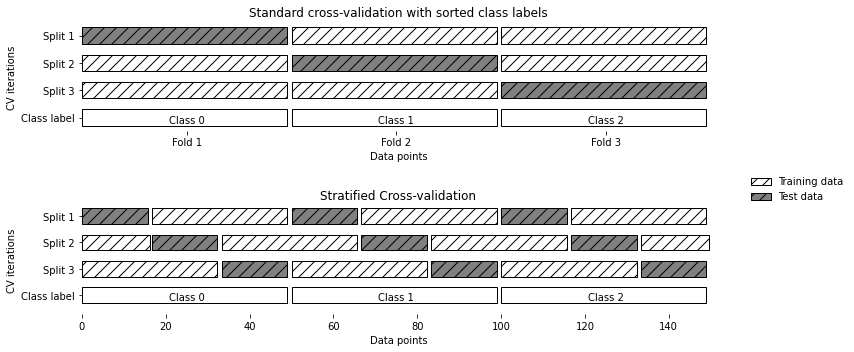

In [4]:
mglearn.plots.plot_stratified_cross_validation()
# 对每一个类都分开选择，保持比例相当， 避免了极端情况，就是恰好全是一个类的数据

1. 对交叉验证的更多控制

In [5]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores: \n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores: 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [6]:
kfold = KFold(n_splits=3)

print("Cross-validation scores: \n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores: 
[0. 0. 0.]


* 这里的每一个折代表的是一个类，那么关于iris数据集，一共有三个类，那么也就是说三折表示不分层。

In [7]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores: \n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
# 这里引入参数 shuffle 打乱数据集

Cross-validation scores: 
[0.98 0.96 0.96]


2. 留一法交叉验证

In [8]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: {}".format(len(scores)))
print("Mean accuracy: {:.2f}".format(scores.mean()))
# 只留下一个值去作为测试集去评估，会相当耗时

Number of cv iterations: 150
Mean accuracy: 0.97


3. 打乱划分交叉验证

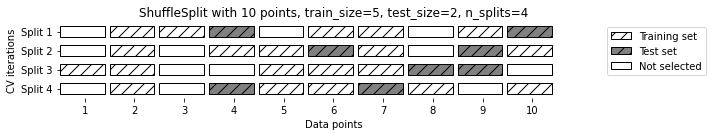

In [9]:
mglearn.plots.plot_shuffle_split()

In [10]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores: \n{}".format(scores))

Cross-validation scores: 
[0.93333333 0.96       0.97333333 0.96       0.96       0.97333333
 0.94666667 0.98666667 0.97333333 0.94666667]


4. 分组交叉验证

In [11]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3,]
scores = cross_val_score(logreg, X, y, groups=groups,cv=GroupKFold(n_splits=3))
print("Cross_validation scores: \n{}".format(scores))

Cross_validation scores: 
[0.5        0.66666667 1.        ]


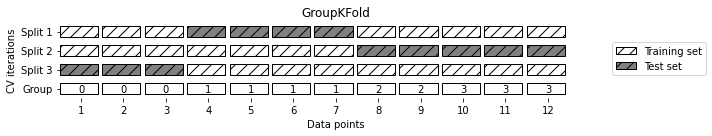

In [12]:
mglearn.plots.plot_group_kfold()

* 分组交叉验证的作用
    * 在从人的照片辨析人的情感的测试中，人数量很多，每个人又有各自对应的表情展示，但是，同一个人的表情虽然不同，脸却是一样的。这就导致如果这个人的不同的表情出现在
    测试集与训练集的时候，就会导致模型对于这个人的脸的识别迅速，而当遇到不同的人的时候，就会导致识别效率下降，所以，我们在这类需要分组的模型训练的时候一定要进行模型的数据分组
    * 在病人的识别中， 我们希望的识别病， 病的种类又有很多，一个人可能同时患上多种，如果不分类，这就跟上面的照片识别一样的结果，模型出现了偏心

## 网格搜索（grid search）

In [13]:
from sklearn.svm import SVC

best_score = 0
best_parameters = {"gamma": 0, "C": 0}
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"gamma": gamma, "C": C}

print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.9736842105263158
Best parameters: {'gamma': 0.001, 'C': 100}


* 表面上看去，我们确实拿到了一个非常优秀的模型，但是注意，这是我们主动选择的一个在测试集上最好的数据，这样仍然会导致这个模型偏心。

In [14]:
# 验证集

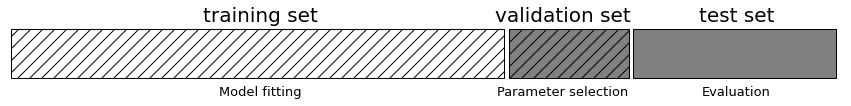

In [15]:
mglearn.plots.plot_threefold_split()

In [16]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

best_score = 0
best_parameters = {"gamma": 0, "C": 0}
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"gamma": gamma, "C": C}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
score = svm.score(X_valid, y_valid)
print("Best score on validation: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test score on validation: {:.2f}".format(score))
# 保留一个最终的测试集是非常重要的，避免过于乐观的评估结果

Best score on validation: 0.97
Best parameters: {'gamma': 0.001, 'C': 100}
Test score on validation: 0.93


### 带交叉验证的网格搜索

In [17]:
best_score = 0
best_parameters = {"gamma": 0, "C": 0}
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        score = cross_val_score(svm, X_trainval, y_trainval, cv=5).mean()
        if score > best_score:
            best_score = score
            best_parameters = {"gamma": gamma, "C": C}

svm = SVC(**best_parameters).fit(X_trainval, y_trainval) # 在测试集和验证集上构建了一个新的模型
print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Best score on valid {}".format(svm.score(X_test, y_test)))



Best score: 0.9731225296442687
Best parameters: {'gamma': 0.1, 'C': 10}
Best score on valid 0.9736842105263158


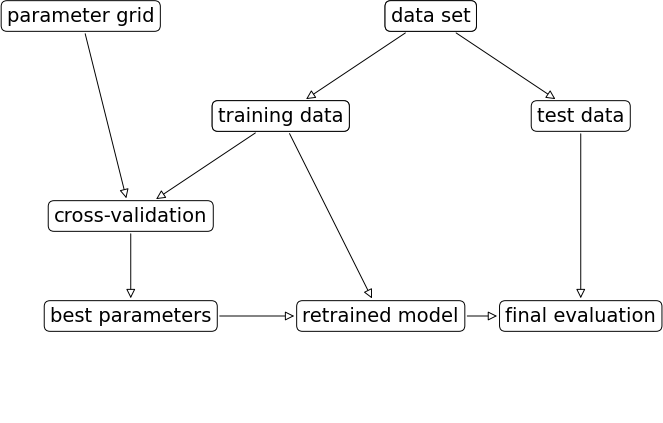

In [18]:
mglearn.plots.plot_grid_search_overview()

In [19]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)


In [20]:
grid_search.fit(X_train, y_train)
print("Test set score: {}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))

Test set score: 0.9736842105263158
Best parameters: {'C': 10, 'gamma': 0.1}
Best score: 0.9731225296442687


* score: 是在整个训练集中出来的模型得出的结果
* best_score: 则是通过这个交叉测试得出来的平均精度

In [21]:
print("Best estimator: {}".format(grid_search.best_estimator_))
print("Best index: {}".format(grid_search.best_index_))

Best estimator: SVC(C=10, gamma=0.1)
Best index: 26


1.分析交叉验证的结果

In [22]:
import pandas as pd
import numpy as np
from pandas import DataFrame
result = DataFrame(grid_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000598,0.000488,0.000199,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000798,0.000399,0.000199,0.000399,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000513,0.000447,0.000511,0.000447,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000399,0.000489,0.000399,0.000489,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000707,0.000396,0.000199,0.000399,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


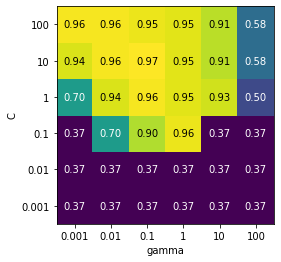

In [23]:
scores = np.array(result.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid["gamma"], ylabel="C", yticklabels=param_grid["C"], cmap="viridis")

In [24]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000598,0.000488,0.000199,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000798,0.000399,0.000199,0.000399,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000513,0.000447,0.000511,0.000447,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000399,0.000489,0.000399,0.000489,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000707,0.000396,0.000199,0.000399,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


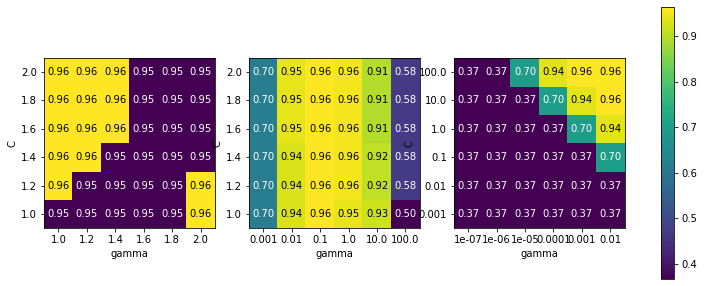

In [25]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7 , -2, 6)}

for param_grid, ax in zip([param_grid, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [26]:
param_grid = [{'kernel': ['rbf'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of param_grid: \n{}".format(param_grid))


List of param_grid: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [27]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: \n{}".format(grid_search.best_params_))
print("Best scores: \n{}".format(grid_search.best_score_))

Best parameters: 
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best scores: 
0.9731225296442687


In [28]:
result = pd.DataFrame(grid_search.cv_results_)
result.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00100975,0.000797939,0.000997066,0.000592232,0.000799417,0.000997019,0.000598478,0.000804901,0.000596523,0.000794744,...,0,0.000598145,0.000997162,0.00119739,0.000598192,0.000797939,0.000398922,0.000797844,0.000797653,0.000398636
std_fit_time,0.000640898,0.00039897,2.2024e-05,0.000483814,0.000399736,2.33602e-07,0.000488656,0.000402651,0.000487064,0.000397929,...,0,0.000488383,1.17383e-06,0.000398494,0.000488422,0.00039897,0.000488578,0.000398922,0.000398827,0.000488227
mean_score_time,0.000598955,0.000398922,0.00019207,0.000609636,0.000199413,0,0.000398827,0.000198841,0.000400496,0.00019927,...,0.000798321,0.000399113,0.000199509,0.000398636,0.000199318,0,0.000199556,0.000199509,0.000598812,0.000398874
std_score_time,0.000489045,0.000488578,0.00038414,0.000497878,0.000398827,0,0.000488461,0.000397682,0.000490505,0.00039854,...,0.000399161,0.000488811,0.000399017,0.000488228,0.000398636,0,0.000399113,0.000399017,0.000488928,0.000488519
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


3. 使用不同的交叉验证策略进行网格搜索

In [29]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), 
                       iris.data, iris.target, cv=5)
print("Cross-validation scores: \n{}".format(scores))
print("Mean cross-validation score: \n{:.2f}".format(scores.mean()))

Cross-validation scores: 
[0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 
0.97


### 二分类指标

* 错误类型：
    * 正类
    * 反类
    * 假正例（明明是反类，却被当作成为了正类）
    * 假反例（明明是正类，却被当作成为了反类）

* 不平衡数据集合
> 数据两个类的样本数量差距巨大，导致模型训练效果无法评估

In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)


In [31]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
pred_most_frequent = dummy.predict(X_test)
print("The most unique part of pred: {}".format(np.unique(pred_most_frequent)))
print("The score of this prediction: {}".format(dummy.score(X_test, y_test)))

The most unique part of pred: [False]
The score of this prediction: 0.8955555555555555


* 这个模型的精度可以高达百分之九十，但是却没有学习到任何东西，这两个类别的样本量差距过大。

In [32]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier(max_depth=2)
dec.fit(X_train, y_train)
print("The score of dec: {:.2f}".format(dec.score(X_test, y_test)))

The score of dec: 0.92


In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("The score of LogisticRegression: {}".format(logreg.score(X_test, y_test)))

The score of LogisticRegression: 0.98


* 混淆矩阵

In [34]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, logreg.predict(X_test))
print("The confusion matrix:\n {}".format(confusion))

The confusion matrix:
 [[400   3]
 [  6  41]]


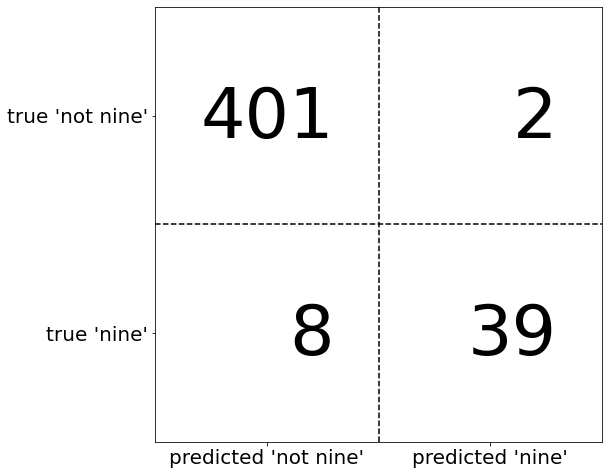

In [35]:
mglearn.plots.plot_confusion_matrix_illustration()

> 混淆矩阵的就是对于二分类问题，结合pred和y_test的综合结果，构建一个二维矩阵，主对角线上显示的是正确的类， 而副对角线上分别是（从左下角到右上角）假反类， 假真类

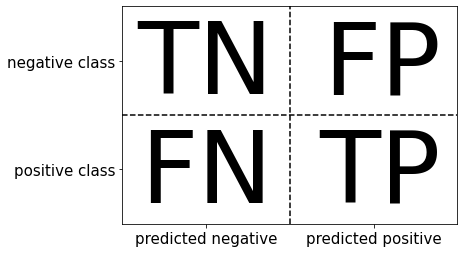

In [36]:
mglearn.plots.plot_binary_confusion_matrix()

In [37]:
print("Most frequent class: \n{}".format(confusion_matrix(y_test, pred_most_frequent)))
print("Dec: \n{}".format(confusion_matrix(y_test, dec.predict(X_test))))
print("LogisticRegression \n{}".format(confusion_matrix(y_test, logreg.predict(X_test))))

Most frequent class: 
[[403   0]
 [ 47   0]]
Dec: 
[[390  13]
 [ 24  23]]
LogisticRegression 
[[400   3]
 [  6  41]]


* 可以发现开始的dummy模型把所有的元素都当作了反类， 没有学习到东西

In [39]:
from IPython.display import Latex

In [41]:
Latex(r'$Accuracy= \frac{TP + TN}{TP + TN + FP + FN}$')

<IPython.core.display.Latex object>

准确率: 测出的正例中有多少是真正的正例

In [43]:
Latex(r'$Precision = \frac{TP}{TP + TN}$')

<IPython.core.display.Latex object>

* 准确率越高，模型就越理想

召回率

In [44]:
Latex(r'$Recall = \frac{TP}{TP + FN}$')

<IPython.core.display.Latex object>

表示出了所有的真正正确的例子中测出的正确的个数是多少

> 准确率与召回率之间需要自己去权衡，因为这二者的大小是完全相反关联的。

* 准确率针对测试过程而言的，所以分母是测试出来的正类
* 召回率针对后分析过程的， 所以分母是实际正类

将二者之间相互联系的一个指标是$f-分数$或者说$f-度量$

$$
F = 2 \cdot \frac{precision \cdot recall}{precision + recall}
$$

In [46]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))

f1 score most frequent: 0.00


In [49]:
print("doc score: {:.2f}".format(f1_score(y_test, dec.predict(X_test))))

doc score: 0.55


In [51]:
print("LogisticRegression: {:.2f}".format(f1_score(y_test, logreg.predict(X_test))))

LogisticRegression: 0.90


f-score 相对于score 更加难以解释，但是对于实际的准确度来说，提高了

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['not line', 'line']))

              precision    recall  f1-score   support

    not line       0.90      1.00      0.94       403
        line       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



classification_report 为每一行提供这类作为正类的准确率， 召回率， f1-score， 以及这个类在所有样本中的真实数量

In [60]:
print(classification_report(y_test, dec.predict(X_test), target_names=['not line', 'line']))

              precision    recall  f1-score   support

    not line       0.94      0.97      0.95       403
        line       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



其实可以看出来一个优秀的模型应该对所有的类都一视同仁，分数不应该有这么大的偏差

In [62]:
print(classification_report(y_test, logreg.predict(X_test), target_names=['not line', 'line']))

              precision    recall  f1-score   support

    not line       0.99      0.99      0.99       403
        line       0.93      0.87      0.90        47

    accuracy                           0.98       450
   macro avg       0.96      0.93      0.94       450
weighted avg       0.98      0.98      0.98       450



在观察了线性模型之后更加坚定了我的猜想

* 考虑不确定性

In [70]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc =SVC(gamma=0.05).fit(X_train, y_train)

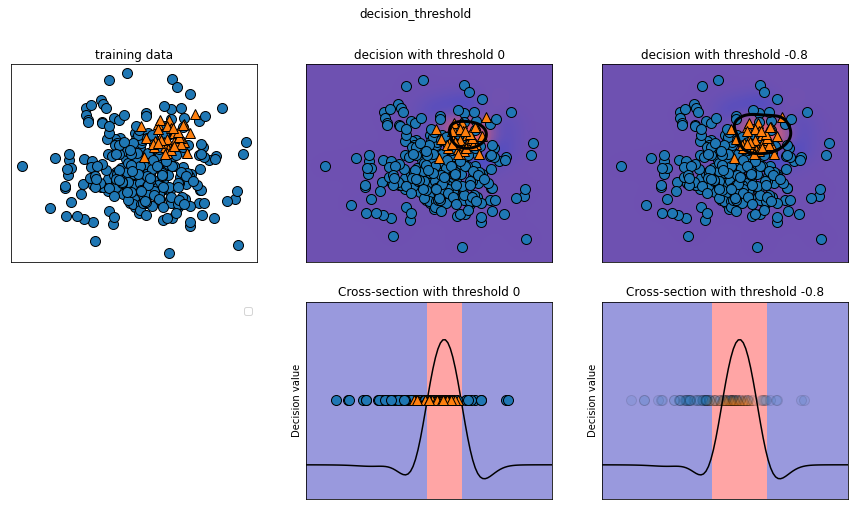

In [74]:
mglearn.plots.plot_decision_threshold()

In [76]:
print(classification_report(y_test, svc.predict(X_test), target_names=['class 1', 'class 2']))

              precision    recall  f1-score   support

     class 1       0.97      0.89      0.93       104
     class 2       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



在癌症筛查中， 我们更加希望的假的正例多一些，假的反例少一些，毕竟多花一些钱测出来没病才更好，那么如果我们把第二个类别当作癌症的检测， 那么我们需要召回率高一些。

In [78]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [82]:
print(classification_report(y_test, y_pred_lower_threshold, target_names=['class 1', 'class 2']))

              precision    recall  f1-score   support

     class 1       1.00      0.82      0.90       104
     class 2       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



可以发现我们通过重新设置阈值，把召回率提高了，但是明显，准确率下降了，但是没事儿， 我们召回率的提高意味着，我们把所有的患病了的人重新建议他们再次筛查一遍， 也就是说假的反例不存在了， 那么就可以在实际生活中把所有有几率患病的人对他们进行一次二次检查。防止漏网之鱼

不要乱设置阈值，会导致分数过于乐观， 换句话说，除非实际要求你这么做， 那么请不要这么做

* 准确率-召回率曲线

In [85]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))

In [88]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))

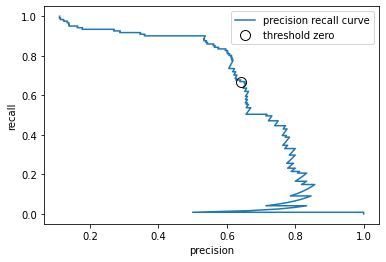

In [97]:
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', 
         fillstyle="none", c='k')
plt.legend(loc='best')

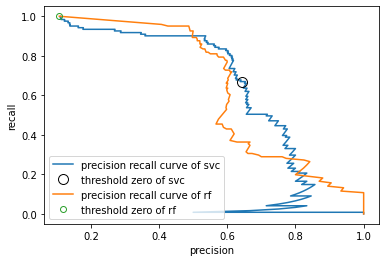

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0,max_features=2)
rf.fit(X_train, y_train)

precisionrf, recallrf, thresholdsrf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label='precision recall curve of svc')
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero of svc', 
         fillstyle="none", c='k')
closeZerorf = np.argmin(np.abs(thresholdsrf))
plt.plot(precisionrf, recallrf, label='precision recall curve of rf')
plt.plot(precisionrf[closeZerorf], recall[closeZerorf], 'o', fillstyle='none', label='threshold zero of rf')
plt.legend()

In [116]:
rf.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.65, 0.35],
       [0.3 , 0.7 ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [120]:
print("The f1 of svc {}".format(f1_score(y_test, svc.predict(X_test))))
print("The f1 of rf {}".format(f1_score(y_test, rf.predict(X_test))))

The f1 of svc 0.6558704453441295
The f1 of rf 0.6097560975609757


$f-score$是针对阈值为零的点处的情况

In [124]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('The average precision of svc {:.3f}'.format(ap_svc))
print('The average precision of rf {:.3f}'.format(ap_rf))

The average precision of svc 0.666
The average precision of rf 0.660


DummyClassifier() 随机分布，是区别于其他分类器的一个完全随机的存在， 没有学到任何东西，只是去概率分配

* 受试者工作特征（ROC）与AUC

> 受试者工作特征曲线（ROC: receiver operating characteristic curve）简称ROC曲线， 是真正例率(TPR)与假正例率(FPR)的曲线， 真正例率是召回率的另外一个别称， 假正例率是假正例占所有假例的比例。

$$
FPR = \frac{FP}{TN + FP}
$$

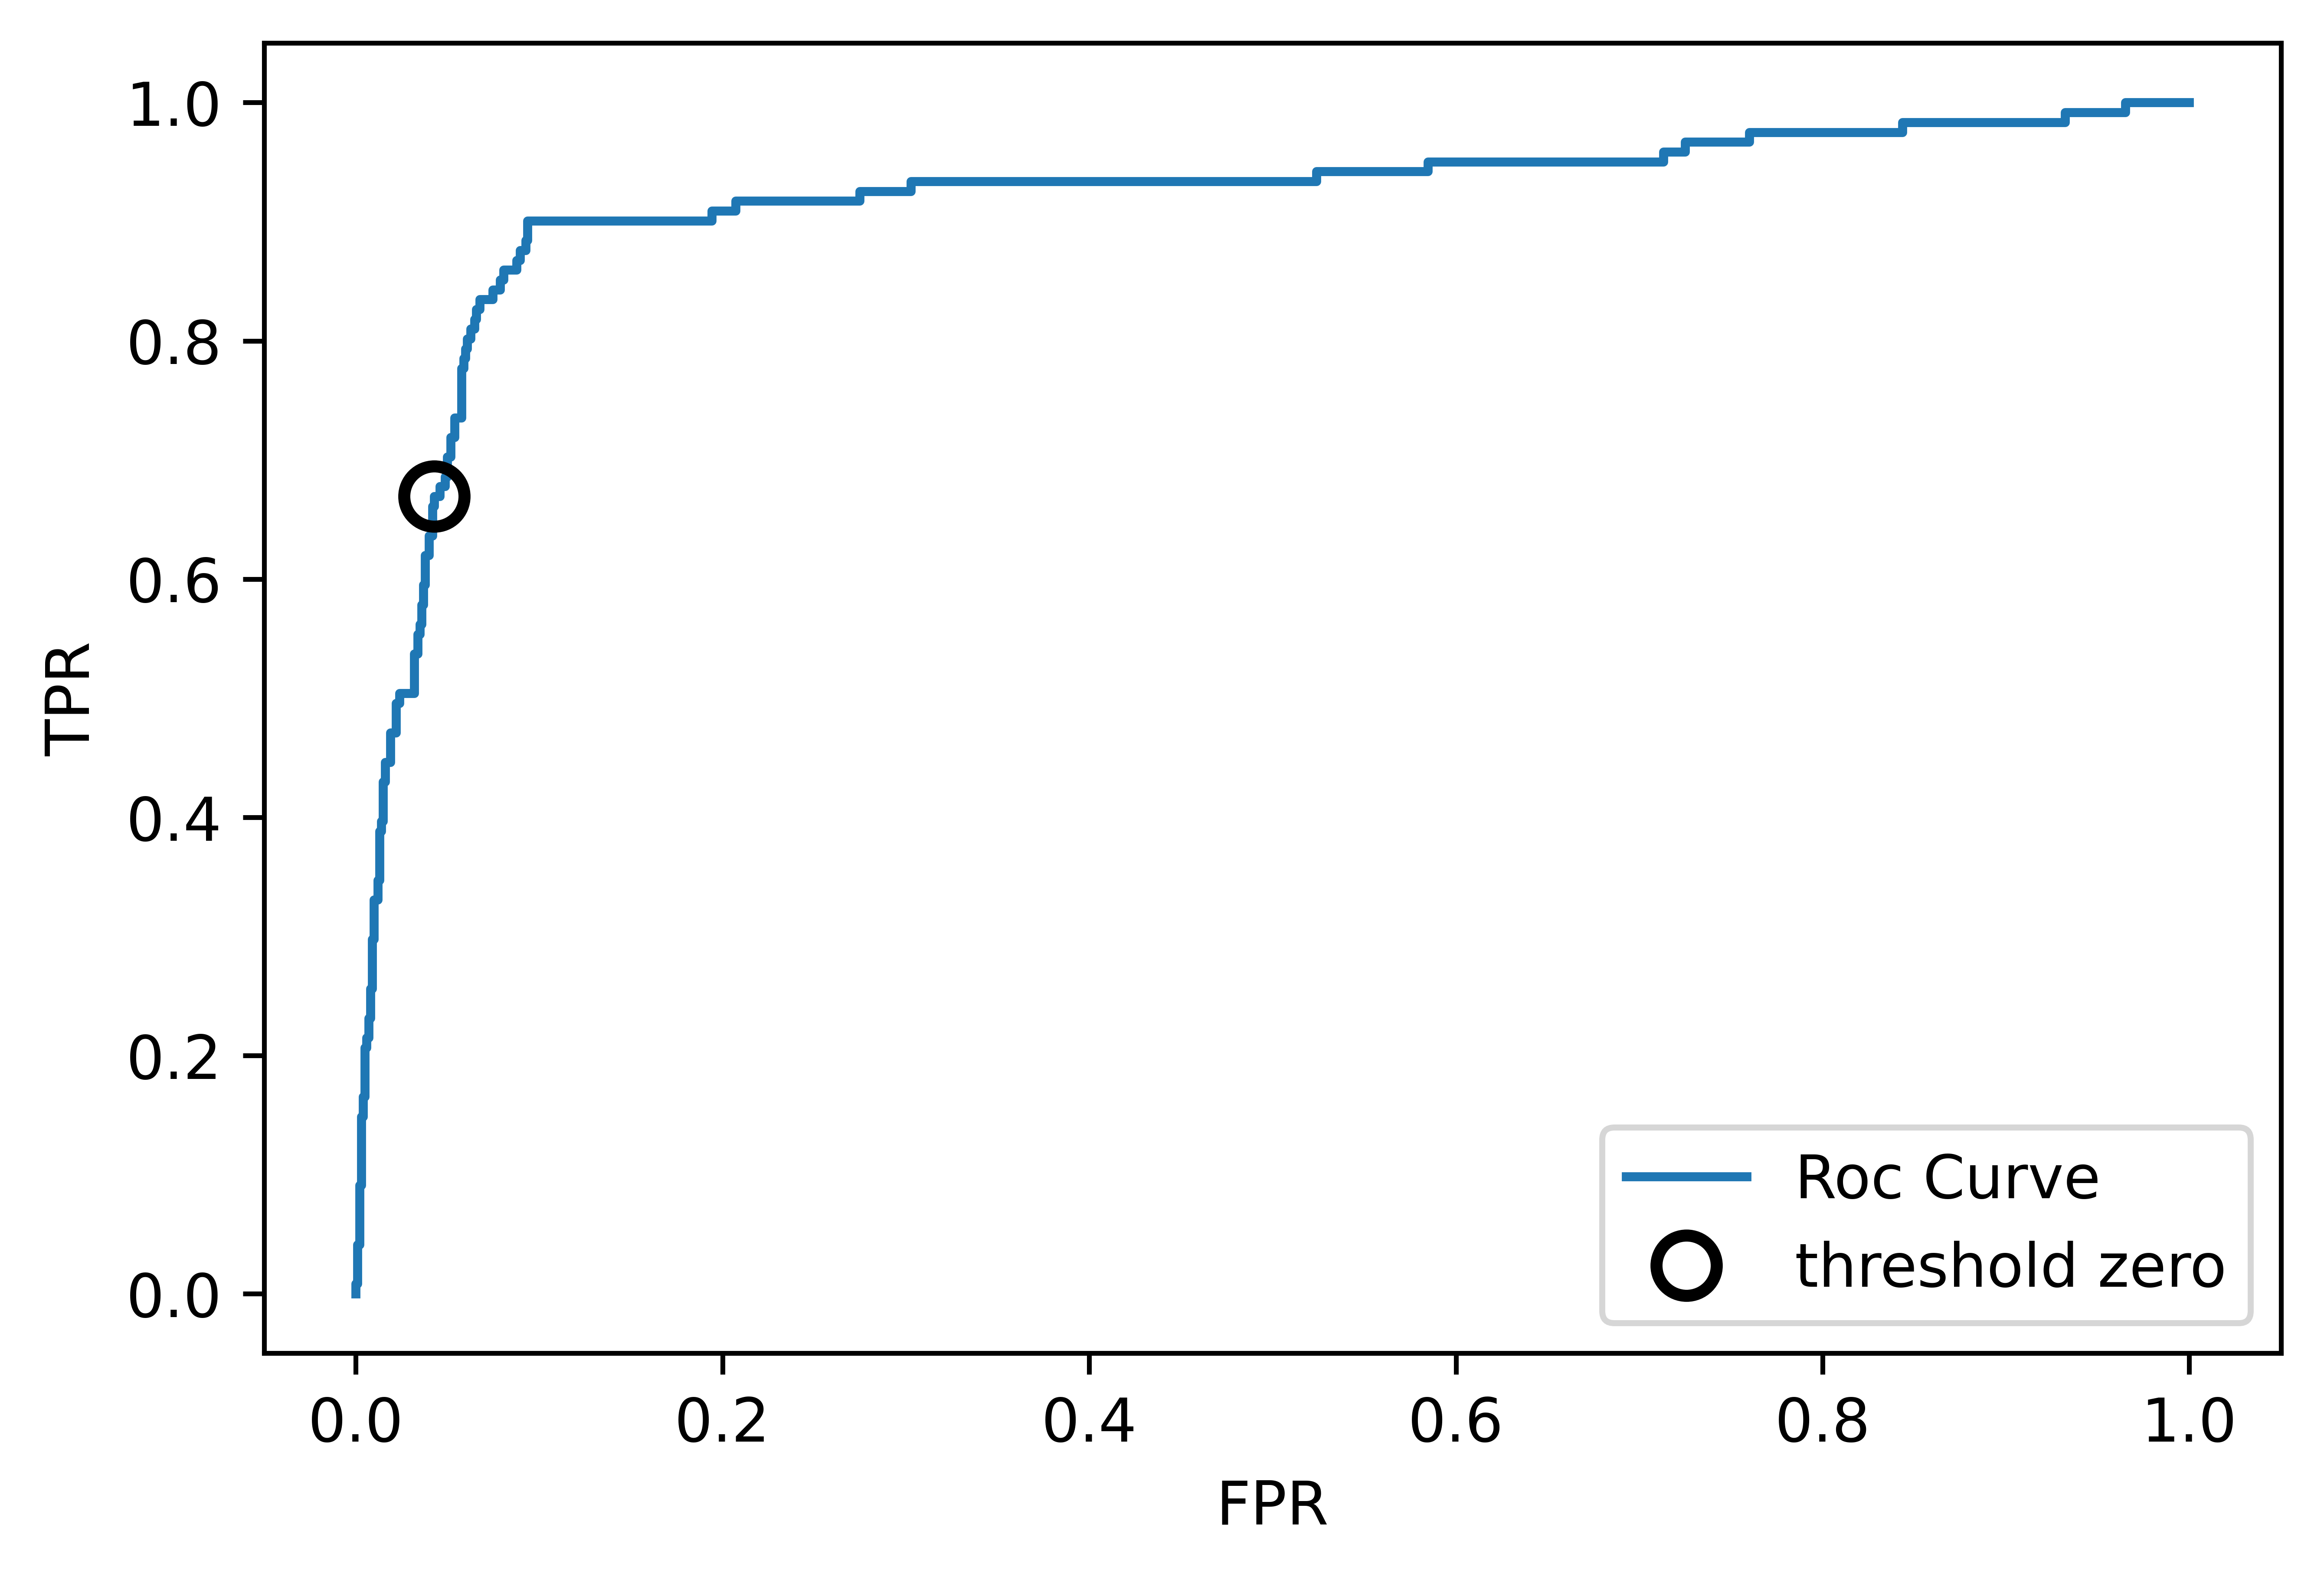

In [127]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.figure(dpi=1000)
plt.plot(fpr, tpr, label='Roc Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
close = np.argmin(np.abs(thresholds))
plt.plot(fpr[close], tpr[close], 'o', markersize=10, label='threshold zero', fillstyle='none',
        c='k', mew=2)
plt.legend()

> 关于曲线的描述：
* 要想真正例率达到最大，也就是说测试出来的假反例为0
* 要想假正例率达到最大，也就是说测试出来的真反例为0

真的正例比正例， 假的正例比反例

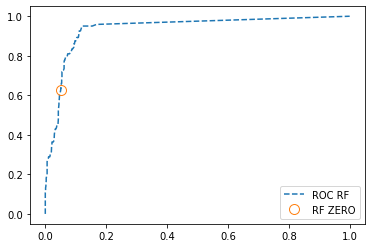

In [133]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr_rf, tpr_rf, '--', label='ROC RF')
close = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(fpr_rf[close], tpr_rf[close], 'o', markersize=10, fillstyle='none',
        label='RF ZERO')
plt.legend()

和准确率-召回率曲线一样，我们希望有一个数字可以描述这个曲线， 这里针对受试者工作特征曲线我们使用AUC来描述

In [136]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("The AUC of SVC: {:.3f}".format(svc_auc))
print("The AUC of RandomForest: {:.3f}".format(rf_auc))

The AUC of SVC: 0.916
The AUC of RandomForest: 0.937


c:\users\hp2\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


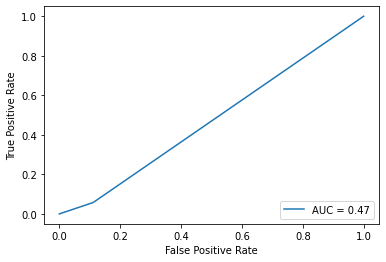

In [140]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

fpr_dum, tpr_dum, threshold = roc_curve(y_test, dummy.predict_proba(X_test)[:, 1])

auc_dum = auc(fpr_dum, tpr_dum)
display = RocCurveDisplay(fpr=fpr_dum, tpr=tpr_dum, roc_auc=auc_dum)
display.plot()

AUC:

* ROC曲线下方的定积分
* 在正类样本中随机取一个点，由分类器给出的分数大于反类样本中随机取一个点的分数更高的概率，（也就是说每次分别从正类反类中分别抽取一个点，而且当正类样本中的点的分数比反类样本的分数高的时候的概率）阈值会影响分类器判断正类负类的概率，所以也会影响AUC的值    
[纯数学证明](https://www.alexejgossmann.com/auc/)    
[几何证明](https://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html)

The auc of svc is 0.50 when gamma is equal to 1 accuracy 0.90
The auc of svc is 1.00 when gamma is equal to 0.05 accuracy 0.90
The auc of svc is 1.00 when gamma is equal to 0.01 accuracy 0.90


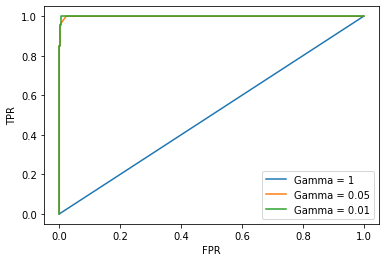

In [147]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    plt.plot(fpr, tpr, label='Gamma = ' + str(gamma))
    print("The auc of svc is {:.2f} when gamma is equal to {} accuracy {:.2f}".format(auc, gamma, accuracy))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

AUC可以反映一个选择器的正确率， 为了提高AUC模型中得到有用的分类结果， 可能还需要调节决策阈值

### 多分类指标

> 对于二分类问题，我们已经有了混淆矩阵， 准确率-召回率曲线， 受试者测试指标曲线， 指标我们由精度， $f-score$， 还有AUC

对于多分类问题，我们由两个常用工具： 混淆矩阵和分类报告。

In [151]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   random_state=0)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
pred = lr.predict(X_test)
score = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}".format(score))
print("Confusion matrix \n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  1  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


c:\users\hp2\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


这模型精度就很离谱

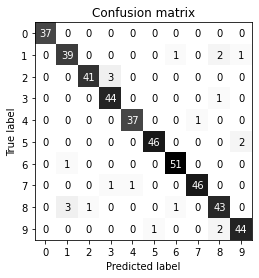

In [157]:
scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label', ylabel='True label',
xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d'),
plt.title("Confusion matrix")
plt.gca().invert_yaxis() # 转换方向显示

In [159]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.96      0.98      0.97        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



> 对于多分类问题，还是可以使用$f-score$只不过是对每一个类都使用这个方法，把除了这个类以外的其他类作为负类进行评定打分，最后取所有$f-score$的平均或者加权平均

macro平均: 计算未加权的按类别$f$分数，所有的类都是一样的权重

weighted平均: 以每个类别的支持度作为权重来计算$f$的平均值

micro平均: 计算所有类别中的假正例， 假反例， 真正例的总数， 然后利用这些来计算准确度，召回率， $f$分数

如果你对每个样本等同看待，那么推荐你使用macro平均， 如果你对每个类别等同看待，那么你就用micro平均

In [185]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

In [162]:
print("Micro average {:.3f}".format(f1_score(y_test, pred, average='micro')))
print("Macro average {:.3f}".format(f1_score(y_test, pred, average='macro')))


Micro average 0.951
Macro average 0.952


### 回归指标

In [172]:
print("Default score of svc when use cross-validation: {}".format(cross_val_score(SVC(),
                    digits.data, digits.target == 9, scoring='accuracy')))

Default score of svc when use cross-validation: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [175]:
print("Default score of svc when use cross-validation: {}".format(cross_val_score(SVC(),
                    digits.data, digits.target == 9, scoring='roc_auc')))

Default score of svc when use cross-validation: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [187]:
param = {'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid=param)
grid_search.fit(X_train, y_train)
print("GridSearch score")
print("The best parameters: {}".format(grid_search.best_params_))
print("The best score: {}".format(grid_search.best_score_))
print("The best AUC score: {}".format(roc_auc_score(y_test, grid_search.decision_function(X_test))))
print("The score: {}".format(grid_search.score(X_test, y_test)))

GridSearch score
The best parameters: {'gamma': 0.001}
The best score: 0.996288035247143
The best AUC score: 0.9996304313394224
The score: 0.9911111111111112


In [190]:
grid_search = GridSearchCV(SVC(), param_grid=param, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("GridSearch score")
print("The best parameters: {}".format(grid_search.best_params_))
print("The best score: {}".format(grid_search.best_score_))
print("The best AUC score: {}".format(roc_auc_score(y_test, grid_search.decision_function(X_test))))
print("The score: {}".format(grid_search.score(X_test, y_test)))

GridSearch score
The best parameters: {'gamma': 0.001}
The best score: 0.9985567397090032
The best AUC score: 0.9996304313394224
The score: 0.9996304313394224


推荐书籍《Data Science For Business》